# 3.3 Plotting with Matplotlib

*Estimated time to complete this notebook: 25 minutes*

## 3.3.1 Importing Matplotlib

We import the `pyplot` object from Matplotlib, which provides us with an interface for making figures.
We usually abbreviate it.

In [1]:
from matplotlib import pyplot as plt

## 3.3.2 Notebook magics

When we write:

In [2]:
%matplotlib inline

We tell the Jupyter notebook to show figures we generate alongside the code that created it, rather than in a separate window.
Lines beginning with a single percent are not python code: they control how the notebook deals with python code.

Lines beginning with two percent signs are "cell magics", that tell Jupyter notebook how to interpret the particular cell;
we've seen `%%writefile` and `%%bash` for example.

## 3.3.3 A basic plot

When we write:

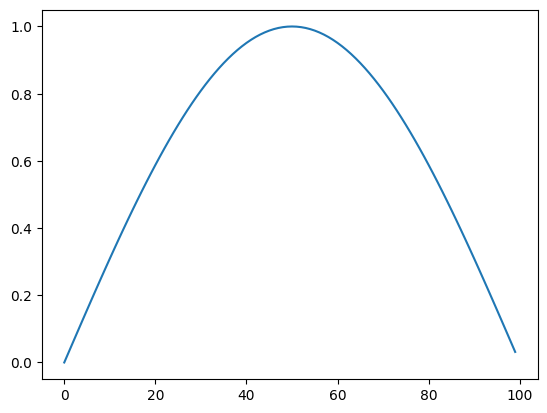

In [3]:
from math import cos, pi, sin

myfig = plt.plot([sin(pi * x / 100.0) for x in range(100)])

The plot command *returns* a figure, just like the return value of any function.
The notebook then displays this.

To add a title, axis labels etc, we need to get that figure object, and manipulate it.
For convenience, matplotlib allows us to do this just by issuing commands to change the "current figure":

Text(0.5, 1.0, 'Hello')

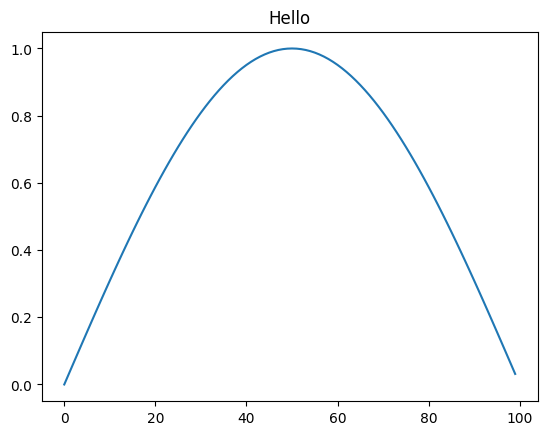

In [4]:
plt.plot([sin(pi * x / 100.0) for x in range(100)])
plt.title("Hello")

But this requires us to keep all our commands together in a single cell, and makes use of a "global" single "current plot", which, while convenient for quick exploratory sketches, is a bit cumbersome.
If we want to produce publication-quality plots from our notebook, `matplotlib`, defines some types we can use to treat individual figures as variables, and manipulate these.

## 3.3.4 Figures and Axes

We often want multiple graphs in a single figure (e.g. for figures which display a matrix of graphs of different variables for comparison).

So Matplotlib divides a `figure` object up into axes: each pair of axes is one 'subplot'.
To make a boring figure with just one pair of axes, however, we can just ask for a default new figure, with
brand new axes.
The relevant function returns a (figure, axis) pair, which we can deal out with parallel assignment.

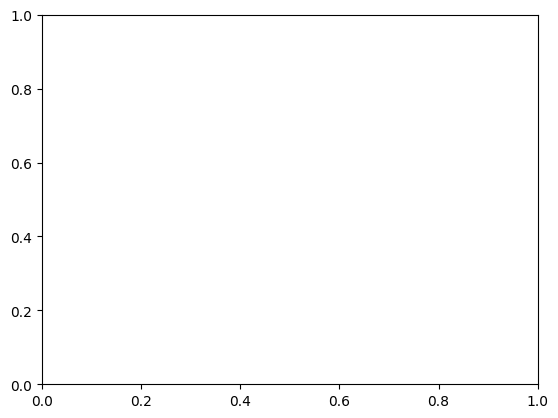

In [5]:
sine_graph, sine_graph_axes = plt.subplots()

Once we have some axes, we can plot a graph on them:

In [6]:
sine_graph_axes.plot([sin(pi * x / 100.0) for x in range(100)], label="sin(x)")

We can add a title to a pair of axes:

In [7]:
sine_graph_axes.set_title("My graph")

Text(0.5, 1.0, 'My graph')

In [8]:
sine_graph_axes.set_ylabel("f(x)")

Text(4.444444444444445, 0.5, 'f(x)')

In [9]:
sine_graph_axes.set_xlabel("100 x")

Text(0.5, 4.444444444444445, '100 x')

Now we need to actually display the figure.
As always with the notebook, if we make a variable be returned by the last line of a code cell, it gets displayed:

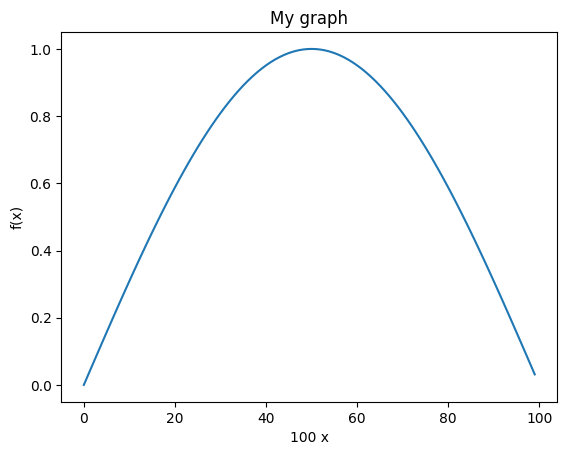

In [10]:
sine_graph

We can add another curve:

In [11]:
sine_graph_axes.plot([cos(pi * x / 100.0) for x in range(100)], label="cos(x)")

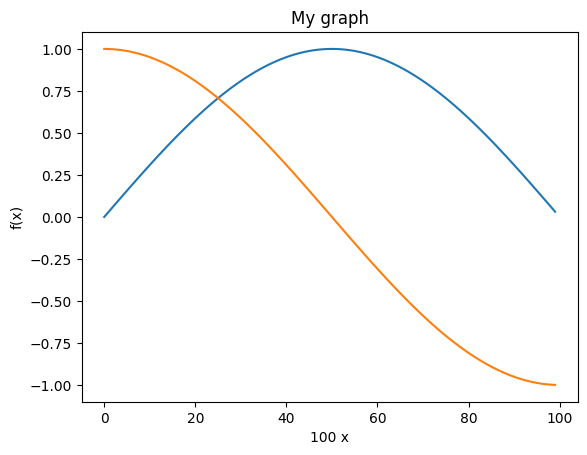

In [12]:
sine_graph

A legend will help us distinguish the curves:

In [13]:
sine_graph_axes.legend()

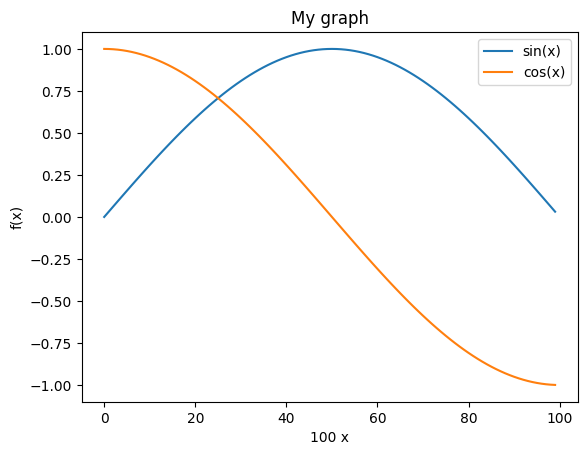

In [14]:
sine_graph

## 3.3.5 Saving figures

We must be able to save figures to disk, in order to use them in papers.
This is really easy:

In [15]:
sine_graph.savefig("my_graph.png")

In order to be able to check that it worked, we need to know how to display an arbitrary image in the notebook.

The programmatic way is like this:

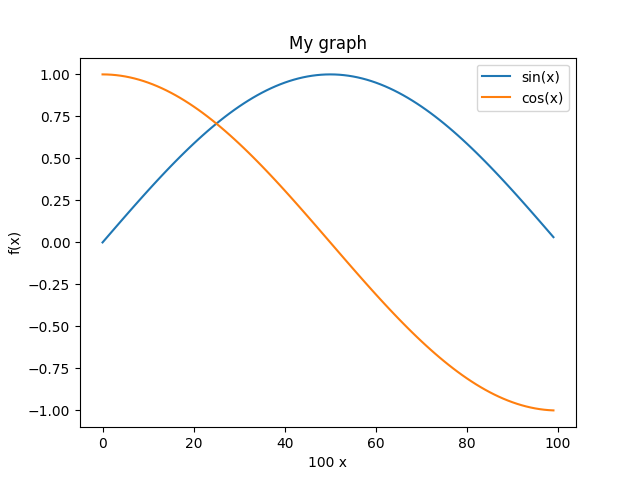

In [16]:
# Use the notebook's own library for manipulating itself.
from IPython.display import Image

Image(filename="my_graph.png")

## 3.3.6 Subplots

We might have wanted the $\sin$ and $\cos$ graphs on separate axes:

In [17]:
double_graph = plt.figure()

<Figure size 640x480 with 0 Axes>

In [18]:
sin_axes = double_graph.add_subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot

In [19]:
cos_axes = double_graph.add_subplot(2, 1, 2)

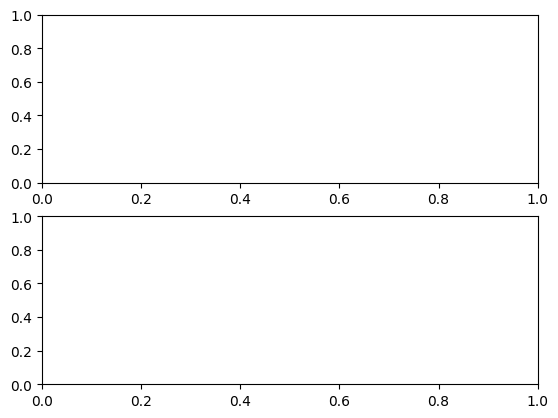

In [20]:
double_graph

In [21]:
sin_axes.plot([sin(pi * x / 100.0) for x in range(100)])

In [22]:
sin_axes.set_ylabel("sin(x)")

Text(4.444444444444445, 0.5, 'sin(x)')

In [23]:
cos_axes.plot([cos(pi * x / 100.0) for x in range(100)])

In [24]:
cos_axes.set_ylabel("cos(x)")

Text(4.444444444444445, 0.5, 'cos(x)')

In [25]:
cos_axes.set_xlabel("100 x")

Text(0.5, 4.444444444444445, '100 x')

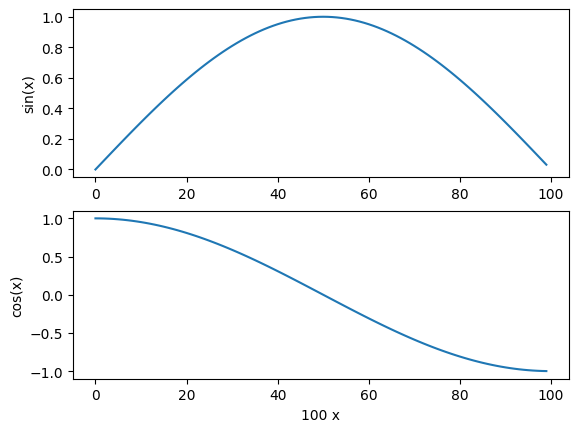

In [26]:
double_graph

## 3.3.7 Versus plots

When we specify a single `list` to `plot`, the x-values are just the array index number.
We usually want to plot something more meaningful:

Text(0.5, 0, 'x')

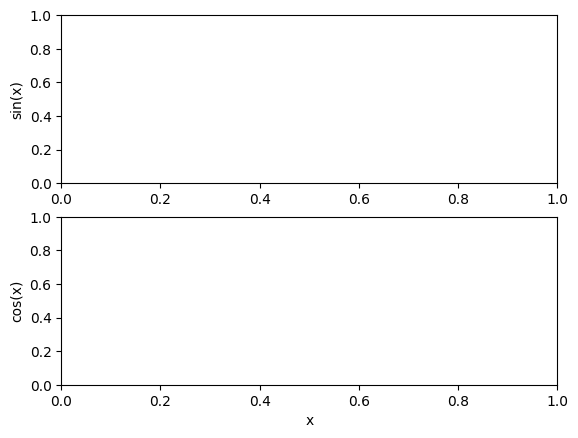

In [27]:
double_graph = plt.figure()
sin_axes = double_graph.add_subplot(2, 1, 1)
cos_axes = double_graph.add_subplot(2, 1, 2)
cos_axes.set_ylabel("cos(x)")
sin_axes.set_ylabel("sin(x)")
cos_axes.set_xlabel("x")

In [28]:
sin_axes.plot(
    [x / 100.0 for x in range(100)], [sin(pi * x / 100.0) for x in range(100)]
)
cos_axes.plot(
    [x / 100.0 for x in range(100)], [cos(pi * x / 100.0) for x in range(100)]
)

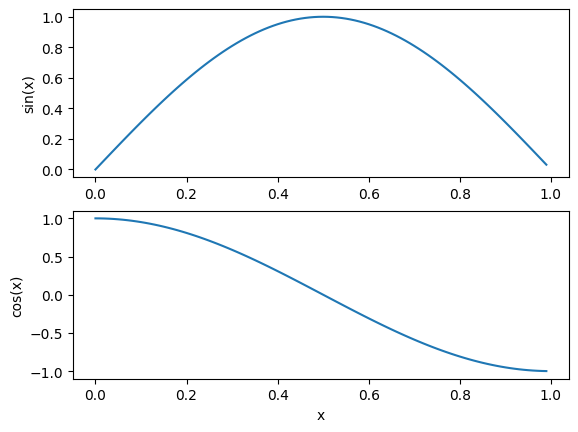

In [29]:
double_graph

## 3.3.8 Sunspot Data

We can incorporate what we have learned in the sunspots example to produce graphs of the data.

In [30]:
import pandas as pd

df = pd.read_csv(
    "http://www.sidc.be/silso/INFO/snmtotcsv.php",
    sep=";",
    header=None,
    names=["year", "month", "date", "mean", "deviation", "observations", "definitive"],
)
df.head()

,year,month,date,mean,deviation,observations,definitive
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1


We can plot all the data in the dataframe separately, but that isn't always useful!

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

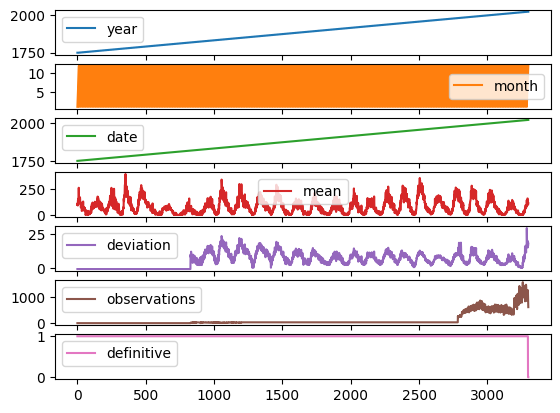

In [31]:
df.plot(subplots=True)

Let's produce some more meaningful and useful visualisations by accessing the dataframe directly.

We start by discarding any rows with an invalid (negative) standard deviation.

In [32]:
df = df[df["deviation"] > 0]

Next we use the dataframe to construct some useful lists.

In [33]:
deviation = df["deviation"].tolist()  # Get the dataframe column (series) as a list
observations = df["observations"].tolist()
mean = df["mean"].tolist()
date = df["date"].tolist()

Text(0.5, 1.0, 'From List')

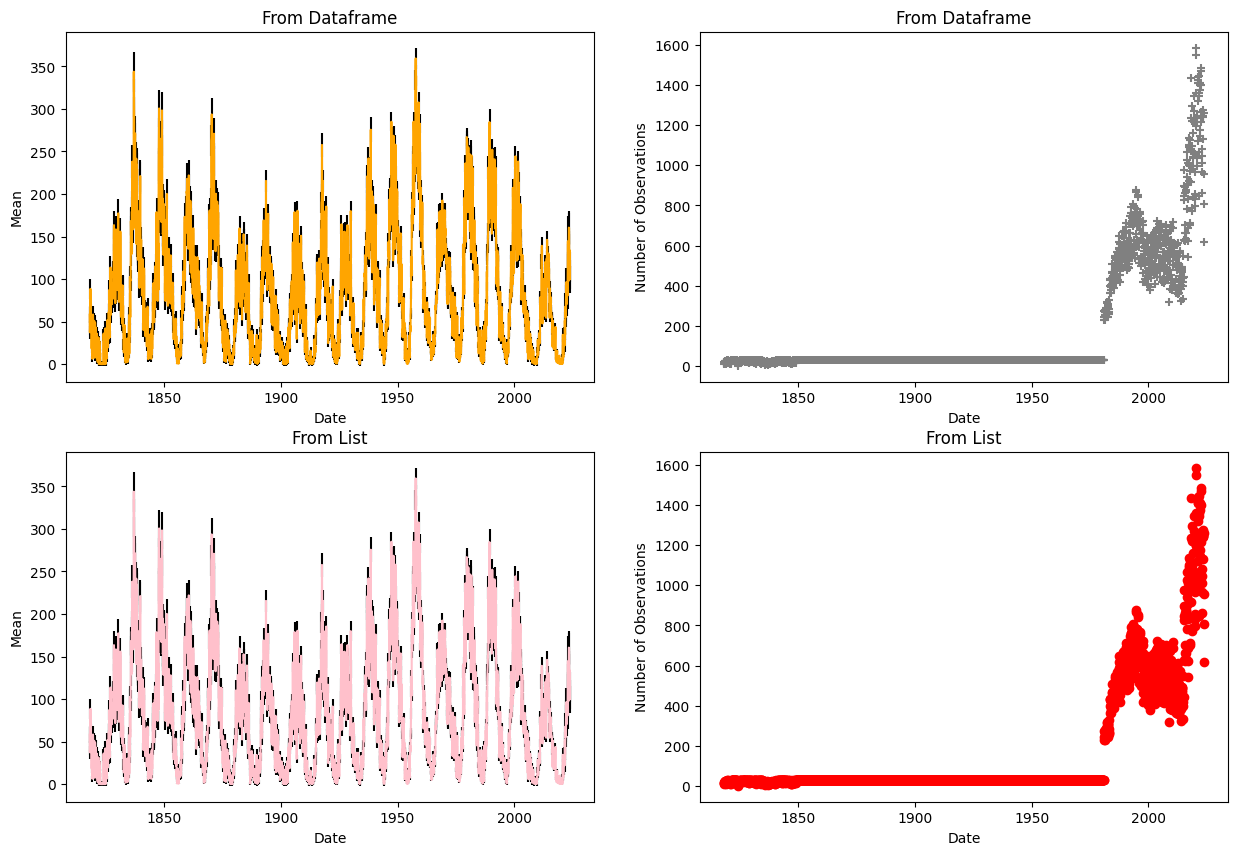

In [34]:
fig = plt.figure(
    figsize=(15, 10)
)  # Set the width of the figure to be 15 inches, and the height to be 5 inches

ax1 = fig.add_subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
ax1.errorbar(
    df["date"],  # Date on the x axis
    df["mean"],  # Mean on the y axis
    yerr=df["deviation"],  # Use the deviation for the error bars
    color="orange",  # Plot the sunspot (mean) data in orange
    ecolor="black",
)  # Show the error bars in black
ax1.set_xlabel("Date")
ax1.set_ylabel("Mean")
ax1.set_title("From Dataframe")

ax2 = fig.add_subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
ax2.scatter(df["date"], df["observations"], color="grey", marker="+")
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Observations")
ax2.set_title("From Dataframe")

ax3 = fig.add_subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
ax3.errorbar(date, mean, yerr=deviation, color="pink", ecolor="black")
ax3.set_xlabel("Date")
ax3.set_ylabel("Mean")
ax3.set_title("From List")

ax4 = fig.add_subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
ax4.scatter(date, observations, color="red", marker="o")
ax4.set_xlabel("Date")
ax4.set_ylabel("Number of Observations")
ax4.set_title("From List")

In this example we are plotting columns from the `pandas` `DataFrame` (series), and from lists to show this method works for both.
`numpy` arrays can also be used.

## 3.3.9 Learning More

There's so much more to learn about `matplotlib`: pie charts, bar charts, heat maps, 3-d plotting, animated plots, and so on.
You can learn all this via the [Matplotlib Website](https://matplotlib.org/stable/).
You should try to get comfortable with all this, so please use some time in class, or at home, to work your way through a bunch of the [examples](https://matplotlib.org/stable/gallery/index.html).